# Modeling / Analysis

In [31]:
from imports import *
import prepare

import acquire
import warnings
warnings.filterwarnings('ignore')

canva_palette = canva_palette = ['#FFB000', '#707E00', '#375F00', '#B39B00', '#002729']
#background_color = '#B39B00'
#sns.set(rc={'figure.facecolor': background_color, 'axes.facecolor': background_color})

In [2]:
df = acquire.get_data()

Reading from local CSV...


In [3]:
df = prepare.prep_data(df)

In [4]:
train, test = prepare.split_data(df)

In [5]:
train.shape

(1238, 25)

In [6]:
test.shape

(496, 25)

### Which category has highest profit per product?

In [13]:
# average sales_per_product by category
train.groupby('category').mean()[['profit_per_product']]

,profit_per_product
category,
Furniture,1.668842
Office Supplies,4.773817
Technology,20.180264


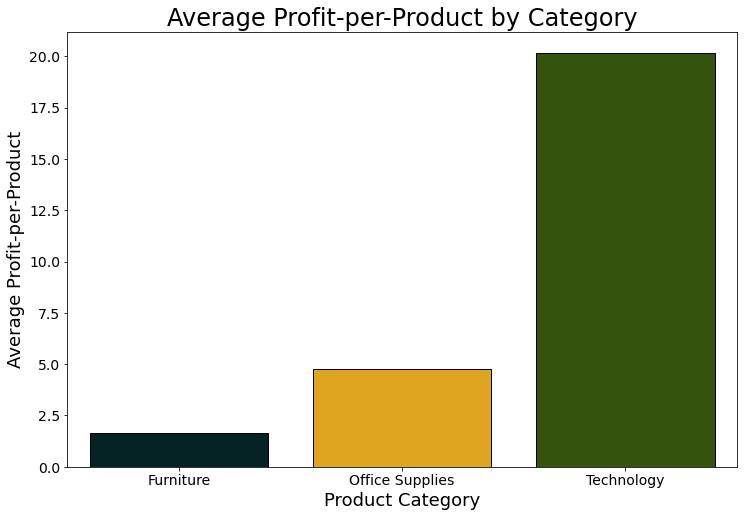

In [20]:
plt.figure(figsize=(12,8))
canva_palette = ['#002729', '#FFB000', '#375F00', '#707E00', '#B39B00']
sns.barplot(data=train, x='category', y='profit_per_product', 
            ci=None, ec='black', palette=canva_palette)
plt.title('Average Profit-per-Product by Category', fontsize=24)
plt.ylabel('Average Profit-per-Product', fontsize=18)
plt.xlabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('profit_per_product_by_category.jpeg')
plt.show()

### Which category has lowest sales volume per product?

In [15]:
# total volume of sales by category
train.groupby('category').sum()[['quantity']]

,quantity
category,
Furniture,1018.0
Office Supplies,2855.0
Technology,891.0


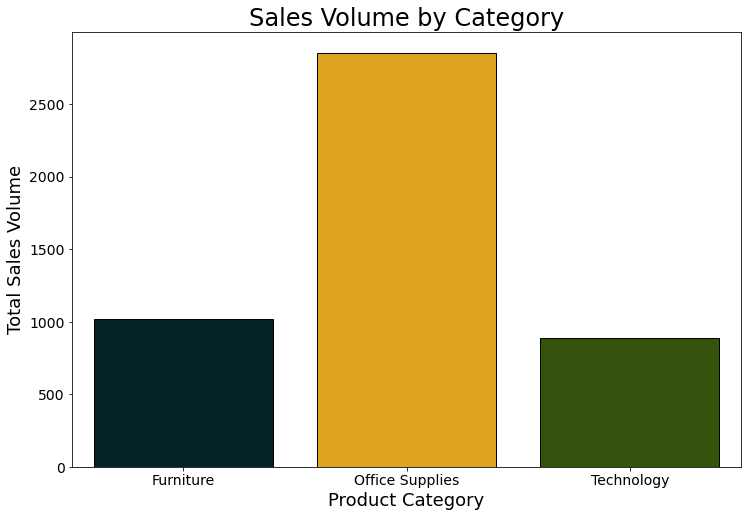

In [21]:
plt.figure(figsize=(12,8))
canva_palette = ['#002729', '#FFB000', '#375F00', '#707E00', '#B39B00']
sns.barplot(data=train, x='category', y='quantity', 
            estimator=sum, ci=None, ec='black', palette=canva_palette)
plt.title('Sales Volume by Category', fontsize=24)
plt.ylabel('Total Sales Volume', fontsize=18)
plt.xlabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('sales_volume_by_category.jpeg')
plt.show()

In [8]:
hypo_tech_sales_17 = test[test.category == 'Technology']
hypo_tech_sales_17 = hypo_tech_sales_17[hypo_tech_sales_17.discount <= .35]
hypothetical_17 = pd.concat([test, hypo_tech_sales_17])

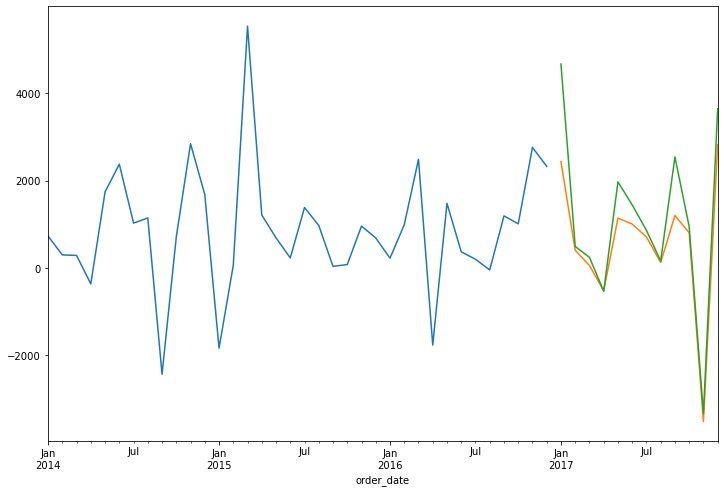

In [9]:
plt.figure(figsize=(12,8))
train['profit'].resample('M').sum().plot()
test['profit'].resample('M').sum().plot()
hypothetical_17['profit'].resample('M').sum().plot()
plt.show()

In [10]:
profits = pd.DataFrame()
profits['actual_2017'] = test.resample('M')['profit'].sum()
profits['projected_2017'] = hypothetical_17.resample('M')['profit'].sum()
profits['difference'] = profits.projected_2017 - profits.actual_2017
profits['difference_pct'] = profits.difference / profits.actual_2017
profits['rolling_total_actual'] = profits.actual_2017.cumsum()
profits['rolling_total_projected'] = profits.projected_2017.cumsum()
profits.index = profits.index.strftime('%b')
profits.index.name = 'month'

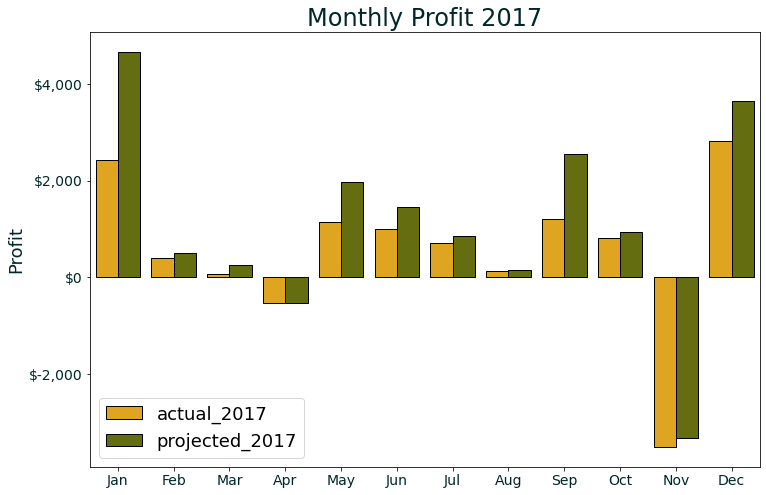

In [53]:
profits_melted = profits[['actual_2017', 'projected_2017']].melt(value_name='sales', ignore_index=False)

plt.figure(figsize=(12,8))
sns.barplot(data=profits_melted, x=profits_melted.index, y='sales', hue='variable', 
            palette=canva_palette, ec='black')
plt.title('Monthly Profit 2017', fontsize=24, color='#002729')
plt.ylabel('Profit', fontsize=18, color='#002729')
plt.xlabel(None)
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
plt.legend(loc='lower left', fontsize=18)
ax = plt.gca()
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_monthly_profit_barplot.jpeg')
plt.show()

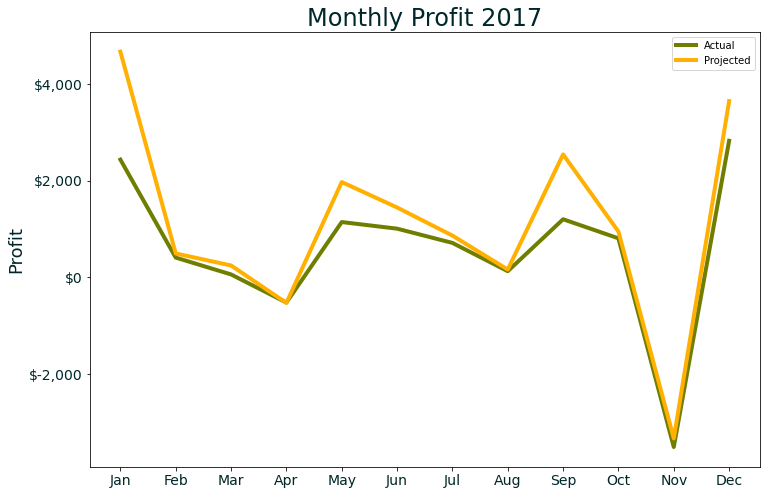

In [14]:
plt.figure(figsize=(12,8))
sns.lineplot(data=profits, x=profits.index, y='actual_2017', 
             color='#707E00', label='Actual', lw=4)
sns.lineplot(data=profits, x=profits.index, y='projected_2017', 
             color='#FFB000', label='Projected', lw=4)
plt.title('Monthly Profit 2017', fontsize=24, color='#002729')
plt.ylabel('Profit', fontsize=18, color='#002729')
plt.xlabel(None)
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
ax = plt.gca()
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_monthly_profit_2017.jpeg')
plt.show()

In [12]:
# project monthly difference in profit
profits.difference_pct.mean()

0.631450651463487

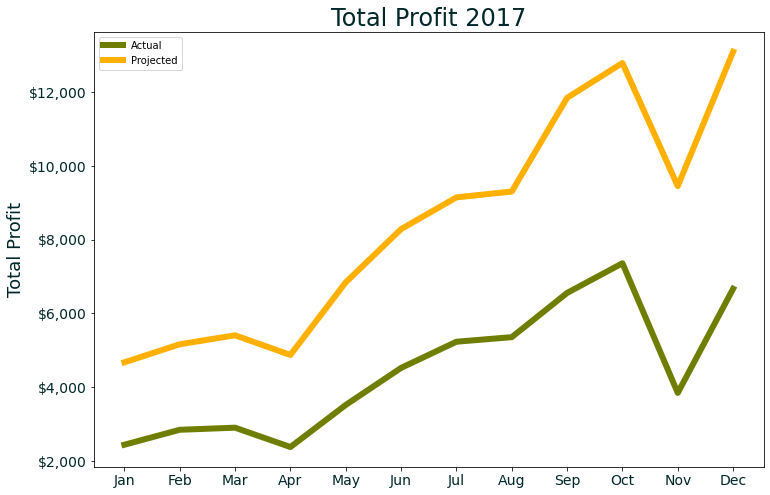

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(data=profits, x=profits.index, y='rolling_total_actual', 
             color='#707E00', label='Actual', lw=6)
sns.lineplot(data=profits, x=profits.index, y='rolling_total_projected', 
             color='#FFB000', label='Projected', lw=6)
plt.title('Total Profit 2017', fontsize=24, color='#002729')
plt.ylabel('Total Profit', fontsize=18, color='#002729')
plt.xlabel(None)
plt.xticks(fontsize=14, color='#002729')
plt.yticks(fontsize=14, color='#002729')
ax = plt.gca()
ax.set_yticklabels([f'${tick:,.0f}' for tick in ax.get_yticks()])
plt.savefig('fig_total_profit_2017.jpeg')
plt.show()

In [52]:
# project annual difference in profit
(profits.projected_2017.sum() - profits.actual_2017.sum()) / profits.actual_2017.sum()

0.9649395879939442

In [11]:
profits

,actual_2017,projected_2017,difference,difference_pct,rolling_total_actual,rolling_total_projected
month,,,,,,
Jan,2435.5112,4670.7580,2235.2468,0.917773,2435.5112,4670.7580
Feb,405.7256,491.3380,85.6124,0.211011,2841.2368,5162.0960
Mar,57.0659,242.6648,185.5989,3.252361,2898.3027,5404.7608
Apr,-525.2456,-532.9703,-7.7247,0.014707,2373.0571,4871.7905
May,1141.9838,1970.5413,828.5575,0.725542,3515.0409,6842.3318
Jun,1005.1213,1443.8302,438.7089,0.436474,4520.1622,8286.1620
Jul,710.1883,861.4282,151.2399,0.212957,5230.3505,9147.5902
Aug,124.1674,158.1578,33.9904,0.273747,5354.5179,9305.7480
Sep,1199.9428,2542.7047,1342.7619,1.119022,6554.4607,11848.4527
